In [2]:
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')
cancer=load_breast_cancer()#加载乳腺癌数据
X=cancer.data#加载乳腺癌判别特征
y=cancer.target#两个特征，y=0时为阴性，y=1时为阳性
print('data shape:{0};no.positive:{1};no.negative:{2}'.format(X.shape,y[y==1].shape,y[y==0].shape))
print(cancer.data[0])#输出



data shape:(569, 30);no.positive:(357,);no.negative:(212,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)#划分训练集和测试集



In [5]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()#逻辑回归模型的建立
model.fit(X_train,y_train)#逻辑回归模型的训练
train_score=model.score(X_train,y_train)#训练的得分
test_score=model.score(X_test,y_test)#测试得分
print('train score:{train_score:.6f};test score:{test_score:.6f}'.format(train_score=train_score,test_score=test_score))




train score:0.951648;test score:0.956140


In [6]:
import numpy as np
y_pred=model.predict(X_test)#进行预测
print('matchs:{0}/{1}'.format(np.equal(y_pred,y_test).shape[0],y_test.shape[0]))#test集的预测对比



matchs:114/114


In [7]:
y_pred_proba=model.predict_proba(X_test)#计算每个样本的预测概率
print('sample of predict probability:{0}'.format(y_pred_proba[0]))#第一样本的预测概率
y_pred_proba_0=y_pred_proba[:,0]>0.1#预测阴性超过10%的样本
result=y_pred_proba[y_pred_proba_0]#对结果集再度计算预测概率
y_pred_proba_1=result[:,1]>0.1#其中阳性大于10%的
print(result[y_pred_proba_1])#输出



sample of predict probability:[0.10076095 0.89923905]
[[0.10076095 0.89923905]
 [0.85530119 0.14469881]
 [0.85746852 0.14253148]
 [0.20967073 0.79032927]
 [0.31757    0.68243   ]
 [0.27224567 0.72775433]
 [0.13847743 0.86152257]
 [0.56555318 0.43444682]
 [0.52084991 0.47915009]
 [0.1098606  0.8901394 ]
 [0.54360839 0.45639161]
 [0.81326758 0.18673242]
 [0.10882329 0.89117671]
 [0.7655087  0.2344913 ]
 [0.66693377 0.33306623]
 [0.85887203 0.14112797]]


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1,**kwarg):#**kwarg是正则项的输入
    polynomial_features=PolynomialFeatures(degree=degree,include_bias=False)#多项式
    logistic_regression=LogisticRegression(**kwarg)#逻辑回归模型的建立
    pipeline=Pipeline([("polynomial_features",polynomial_features),("logistic_regression",logistic_regression)])#生成模型
    return pipeline



In [9]:
import time
model=polynomial_model(degree=2,penalty='l1')#使用L1范式作为正则项，进行稀疏化
start=time.clock()#计时开始
model.fit(X_train,y_train)#训练模型
train_score=model.score(X_train,y_train)#训练集分数
cv_score=model.score(X_test,y_test)#test集分数
print('elaspe:{0:.6f};train_score:{1:.6f};cv_socre:{2:.6f};'.format(time.clock()-start,train_score,cv_score))



elaspe:0.298461;train_score:0.997802;cv_socre:0.982456;


In [10]:
logistic_regression=model.named_steps['logistic_regression']
print('model parameters shape:{0};count of non-zero element:{1}'.format(
    logistic_regression.coef_.shape,np.count_nonzero(logistic_regression.coef_)))



model parameters shape:(1, 495);count of non-zero element:101


In [11]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(0.1,1.0,5)):
    plt.title(title)#图像标题
    if ylim is not None:#y轴限制不为空时
        plt.ylim(*ylim)
    plt.xlabel("Training examples")#两个标题
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)#获取训练集大小，训练得分集合，测试得分集合
    train_scores_mean=np.mean(train_scores,axis=1)#将训练得分集合按行的到平均值
    train_scores_std=np.std(train_scores,axis=1)#计算训练矩阵的标准方差
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()#背景设置为网格线
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    # plt.fill_between()函数会把模型准确性的平均值的上下方差的空间里用颜色填充。
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
    # 然后用plt.plot()函数画出模型准确性的平均值
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross_validation score')
    plt.legend(loc='best')#显示图例
    return plt



elaspe:8.899691


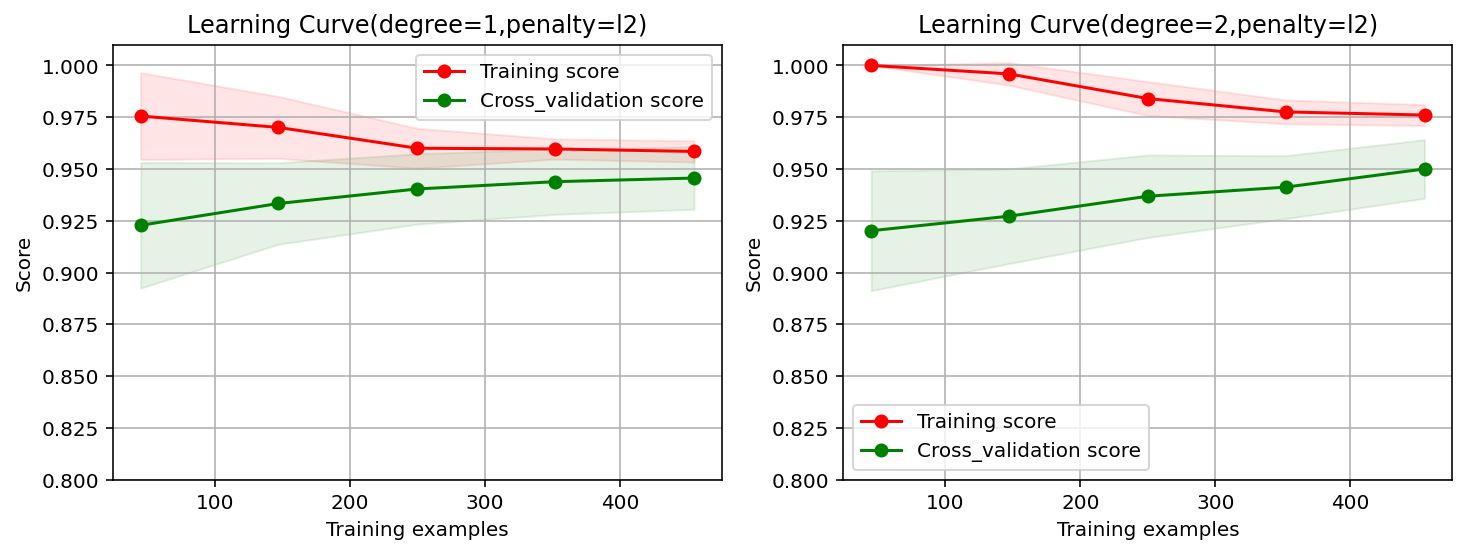

In [14]:
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
title='Learning Curve(degree={0},penalty={1})'
degrees=[1,2]
#penalty='l1'
penalty='l2'




start=time.clock()
plt.figure(figsize=(12,4),dpi=144)
for i in range(len(degrees)):
    plt.subplot(1,2,i+1)
    plot_learning_curve(polynomial_model(degree=degrees[i],penalty=penalty),title.format(degrees[i],penalty),X,y,ylim=(0.8,1.01),cv=cv)

print('elaspe:{0:.6f}'.format(time.clock()-start))



In [4]:
import math
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


class SVM():
    def __init__(self, C, kernel, kernel_arg, e=0.001):
        '''
                                    kernel_arg
        kernel的类型: 'linear':     1
                    'poly':        d(d>1且为整数)
                    'gaussian':    σ(σ>0)
                    'lapras':      σ(σ>0)
                    'sigmoid':     beta,theta(beta>0,theta<0)
        kernel_arg若不符合要求将按照默认参数进行计算
        C为目标函数非线性部分的权重
        e为误差

        '''
        self.kernel = kernel
        self.kernel_arg = kernel_arg
        self.C = C
        self.e = e
        self.bias = 0

    def kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'poly':
            if isinstance(self.kernel_arg, int) == False:
                self.kernel_arg = 2
            return np.dot(x1, x2)**self.kernel_arg
        elif self.kernel == 'gaussian':
            if isinstance(self.kernel_arg, float) == False:
                self.kernel_arg = 0.5
            return math.exp(-np.linalg.norm(x1 - x2)**2 / (2 * self.kernel_arg**2))
        elif self.kernel == 'lapras':
            if isinstance(self.kernel_arg, float) == False:
                self.kernel_arg = 0.5
            return math.exp(-np.linalg.norm(x1 - x2) / self.kernel_arg)
        elif self.kernel == 'sigmoid':
            if len(self.kernel_arg) != 2:
                self.kernel_arg = [0.5, -0.5]
            if self.kernel_arg[0] <= 0:
                self.kernel_arg[0] = 0.5
            if self.kernel_arg[1] >= 0:
                self.kernel_arg[1] = 0.5
            return math.tanh(self.kernel_arg[0] * np.dot(x1, x2) + self.kernel_arg[1])

    def fit(self, train_x, train_y, max_iter=1000):
        self.train_x = np.array(train_x)
        self.train_y = np.array(train_y)
        self.alpha = np.zeros(train_x.shape[0])
        iter = 0

        while(iter < max_iter):
            print('iter = {}'.format(iter))
            index1, index2 = self.SMO_get_alpha()
            if index1 == -1:
                print('结束迭代, iter = {}'.format(iter))
                break
            train_result = self.SMO_train(index1, index2)
            if train_result == True:
                print('结束迭代, iter = {}'.format(iter))
                break
            iter += 1

    def SMO_get_alpha(self):
        for i in range(self.alpha.shape[0]):
            if 0 < self.alpha[i] < self.C:
                if self.train_y[i] * self.f(self.train_x[i]) != 1:
                    index2 = self.choose_another_alpha(i)
                    return i, index2
        for i in range(self.alpha.shape[0]):
            if self.alpha[i] == 0:
                if self.train_y[i] * self.f(self.train_x[i]) < 1:
                    index2 = self.choose_another_alpha(i)
                    return i, index2
            elif self.alpha[i] == self.C:
                if self.train_y[i] * self.f(self.train_x[i]) > 1:
                    index2 = self.choose_another_alpha(i)
                    return i, index2
        return -1, -1

    def f(self, x):
        result = 0
        for i in range(self.alpha.shape[0]):
            result += self.alpha[i] * self.train_y[i] * \
                self.kernel_function(self.train_x[i], x)
        return result + self.bias

    def error(self, index):
        return self.f(self.train_x[index]) - self.train_y[index]

    def choose_another_alpha(self, index):
        result_index = 0
        temp_diff_error = 0
        for i in range(self.alpha.shape[0]):
            diff_error = np.abs(self.error(index) - self.error(i))
            if diff_error > temp_diff_error:
                temp_diff_error = diff_error
                result_index = i
        return result_index

    def SMO_train(self, index1, index2):
        old_alpha = self.alpha.copy()
        x1 = self.train_x[index1]
        y1 = self.train_y[index1]
        x2 = self.train_x[index2]
        y2 = self.train_y[index2]

        eta = self.kernel_function(
            x1, x1) + self.kernel_function(x2, x2) - 2 * self.kernel_function(x1, x2)
        alpha2 = old_alpha[index2] + y2 * \
            (self.error(index1) - self.error(index2)) / eta

        if y1 != y2:
            L = max(0, old_alpha[index2] - old_alpha[index1])
            H = min(self.C, self.C + old_alpha[index2] - old_alpha[index1])
        else:
            L = max(0, old_alpha[index1] + old_alpha[index2] - self.C)
            H = min(self.C, old_alpha[index1] + old_alpha[index2])

        if alpha2 > H:
            alpha2 = H
        elif alpha2 < L:
            alpha2 = L

        alpha1 = old_alpha[index1] + y1 * y2 * (old_alpha[index2] - alpha2)

        self.alpha[index1] = alpha1
        self.alpha[index2] = alpha2

        b1 = -self.error(index1) \
            - y1 * self.kernel_function(x1, x1) * (alpha1 - old_alpha[index1]) \
            - y2 * self.kernel_function(x1, x2) * (alpha2 - old_alpha[index2]) \
            + self.bias

        b2 = -self.error(index2) \
            - y1 * self.kernel_function(x1, x2) * (alpha1 - old_alpha[index1]) \
            - y2 * self.kernel_function(x2, x2) * (alpha2 - old_alpha[index2]) \
            + self.bias
        if 0 < alpha1 < self.C:
            self.bias = b1
        elif 0 < alpha2 < self.C:
            self.bias = b2
        else:
            self.bias = (b1 + b2) / 2

        print('E = {}'.format(np.linalg.norm(old_alpha - self.alpha)))
        if np.linalg.norm(old_alpha - self.alpha) < self.e:
            return True
        else:
            return False

    def predict_one(self, x):
        if self.f(x) > 0:
            return 1
        else:
            return -1

    def predict(self, x_group):
        return np.array([self.predict_one(x) for x in x_group])


if __name__ == '__main__':

    lda = LinearDiscriminantAnalysis(n_components=2)
    lda.fit(X, y)
    X = lda.transform(X)

    train_data = X[0::2, :]
    train_label = y[0::2]
    for i in range(train_label.shape[0]):
        if train_label[i] != 1:
            train_label[i] = -1
        else:
            train_label[i] = 1

    test_data = X[1::2, :]
    test_label = y[1::2]

    for i in range(test_label.shape[0]):
        if test_label[i] != 1:
            test_label[i] = -1
        else:
            test_label[i] = 1

    svm = SVM(5, 'gaussian', 0.5, 0.001)
    svm.fit(train_data, train_label)

    predict_label = svm.predict(test_data)
    a = predict_label - test_label
    print(a)

    # print(svm.alpha)
    count = 0
    for i in range(a.shape[0]):
        if a[i] == 0:
            count += 1
    print(count / test_label.shape[0])

    points = []
    for i in np.linspace(-10.0, 10.0, num=400):#获取超平面上的点为了作图
        for j in np.linspace(-5.0, 5.0, num=200):
            x_ij = np.array([i, j])
            if -0.05 < svm.f(x_ij) < 0.05:
                tmp = [i, j]
                points.append(tmp)

    points = np.array(points)
    print(points)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

    plt.scatter(points[:, 0], points[:, 1], marker='o')

    plt.show()

NameError: name 'X' is not defined